In [ ]:
# load modules
from matplotlib import pyplot as plt
import zipfile
import netCDF4
import random
import numpy as np

In [ ]:
# load zip file from drive
with zipfile.ZipFile("drive/MyDrive/lulcc_data.zip","r") as zip_ref:
  zip_ref.extractall("")

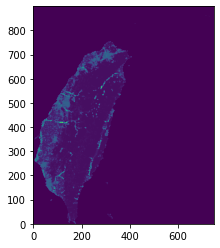

In [ ]:
# predict 2017 using 2016 data
nc_1 = netCDF4.Dataset("lulcc_data/SSP126_nc/LUH2_126_2016.nc")
pre_nc_2 = np.empty([900,747])
rd_nc_1 = np.empty([902,749])
for i in range(900):
  for j in range(747):
    rd_nc_1[i+1][j+1] = nc_1["LC"][i][j]
for i in range(1,901):
  for j in range(1,748):
    if nc_1["LC"][i-1][j-1] == 0:
      pre_nc_2[i-1][j-1] = 0
    else:
      tmp = []
      if rd_nc_1[i-1][j-1] != 0:
        tmp.append(rd_nc_1[i-1][j-1])
      if rd_nc_1[i][j-1] != 0:
        tmp.append(rd_nc_1[i][j-1])
      if rd_nc_1[i+1][j-1] != 0:
        tmp.append(rd_nc_1[i+1][j-1])
      if rd_nc_1[i-1][j] != 0:
        tmp.append(rd_nc_1[i-1][j])
      if rd_nc_1[i+1][j] != 0:
        tmp.append(rd_nc_1[i+1][j])
      if rd_nc_1[i-1][j+1] != 0:
        tmp.append(rd_nc_1[i-1][j+1])
      if rd_nc_1[i][j+1] != 0:
        tmp.append(rd_nc_1[i][j+1])
      if rd_nc_1[i+1][j+1] != 0:
        tmp.append(rd_nc_1[i+1][j+1])
      if tmp == []:
        pre_nc_2[i-1][j-1] = nc_1["LC"][i-1][j-1]
      else:
        c = random.choice(tmp)
        pre_nc_2[i-1][j-1] = c
plt.imshow(pre_nc_2)
plt.gca().invert_yaxis()

In [ ]:
# compare 2017
unique,counts = np.unique(np.array(pre_nc_2),return_counts=True)
stats = dict(zip(unique,counts))
print("My prediction:",stats)
nc_2 = netCDF4.Dataset("lulcc_data/SSP126_nc/LUH2_126_2017.nc")
unique,counts = np.unique(np.array(nc_2["LC"]),return_counts=True)
stats = dict(zip(unique,counts))
print("LULCC_TW data:",stats)

My prediction: {0.0: 527442, 1.0: 94135, 2.0: 31319, 8.0: 15801, 13.0: 2301, 26.0: 1302}
LULCC_TW data: {0.0: 527442, 1.0: 91608, 2.0: 33064, 8.0: 16508, 13.0: 2399, 26.0: 1279}


17.51094174985158 %


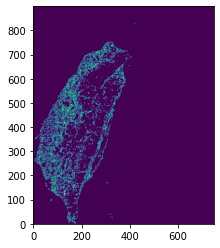

In [ ]:
# plot differences
diff = np.empty([900,747])
for i in range(900):
  for j in range(747):
    if nc_2["LC"][i][j] != pre_nc_2[i][j]:
      diff[i][j] = 1
    else:
      diff[i][j] = 0
plt.imshow(diff)
plt.gca().invert_yaxis()
unique,counts = np.unique(diff,return_counts=True)
stats = dict(zip(unique,counts))
print(stats[1]/144858*100,"%")